In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
file_name = r"C:\Users\Administrator\Downloads\SLD2.csv"
df = pd.read_csv(file_name)
print(df.head())

   Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0           1                  6.9                            3.8   
1           2                  5.3                            3.5   
2           3                  5.1                            3.9   
3           4                  6.5                            2.1   
4           5                  8.1                            0.6   

   Sleep_Hours_Per_Day  Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day  \
0                  8.7                   2.8                              1.8   
1                  8.0                   4.2                              3.0   
2                  9.2                   1.2                              4.6   
3                  7.2                   1.7                              6.5   
4                  6.5                   2.2                              6.6   

    GPA Stress_Level  
0  2.99     Moderate  
1  2.75          Low  
2  2.67          Low  
3  2.8

In [3]:
imputer = SimpleImputer(strategy='mean')
df['Sleep_Hours_Per_Day'] = imputer.fit_transform(df[['Sleep_Hours_Per_Day']])


In [4]:
label_encoder = LabelEncoder()
df['Stress_Level'] = label_encoder.fit_transform(df['Stress_Level'])

In [5]:
features = [
    'Study_Hours_Per_Day',
    'Extracurricular_Hours_Per_Day',
    'Sleep_Hours_Per_Day',
    'Social_Hours_Per_Day',
    'Physical_Activity_Hours_Per_Day'
]
X = df[features]
y = df['Stress_Level']

In [6]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)



In [15]:

print("X_train shape is: ", X_train.shape)
print("X_test shape is: ", X_test.shape)


X_train shape is:  (1600, 5)
X_test shape is:  (400, 5)


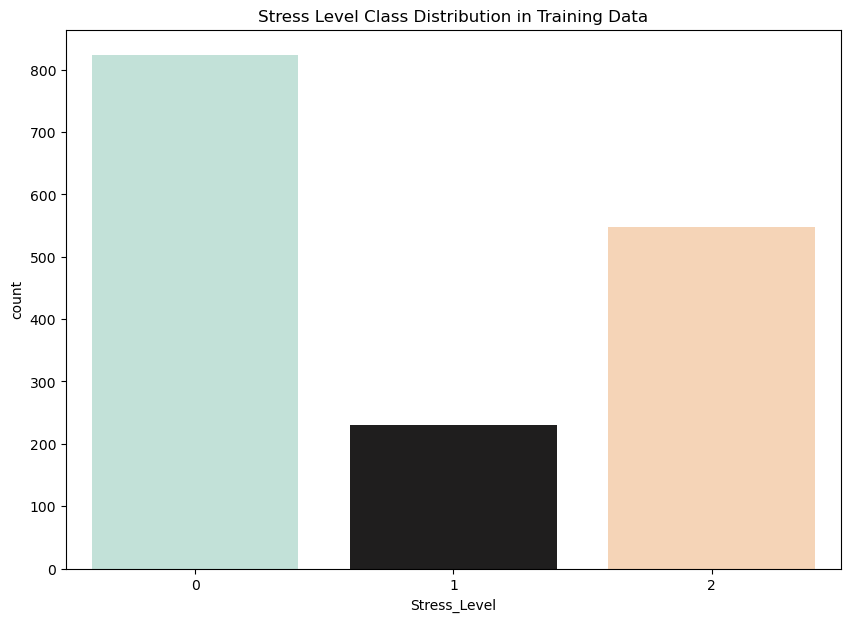

Stress_Level
0    823
2    547
1    230
Name: count, dtype: int64

In [17]:
plt.figure(figsize=(10,7))
sns.countplot(x=Y_train, hue=Y_train, palette="icefire", legend=False)
plt.title("Stress Level Class Distribution in Training Data")
plt.show()
Y_train.value_counts()

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [21]:
y_pred = knn.predict(X_test)

In [23]:
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.1975


In [25]:
cm = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[198   0   8]
 [  3  57   7]
 [  8   5 114]]


In [27]:
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.9225
